You are going to repeat this exercise in both TensorFlow (part1) and PyTorch (part2)

# Use the provided datafile and complete the following steps. Complete the assignment within a .ipynb notebook. Submit either the .ipynb, .html, or .pdf of the results.

## Step 1. Import the data from the given .csv file (diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [1]:
import torch
import torch.nn as nn
import pandas as pd

In [387]:
df = pd.read_csv("diabetes.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [388]:
'''
    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age
'''
column_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8',
               'label']  

# column_names = [
#     "Pregnancies",
#     "Glucose",
#     "BloodPressure",
#     "SkinThickness",
#     "Insulin",
#     "BMI",
#     "DiabetesPedigreeFunction",
#     "Age",
#     "label"
# ]
df.columns = column_names
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,label
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [389]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,label
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


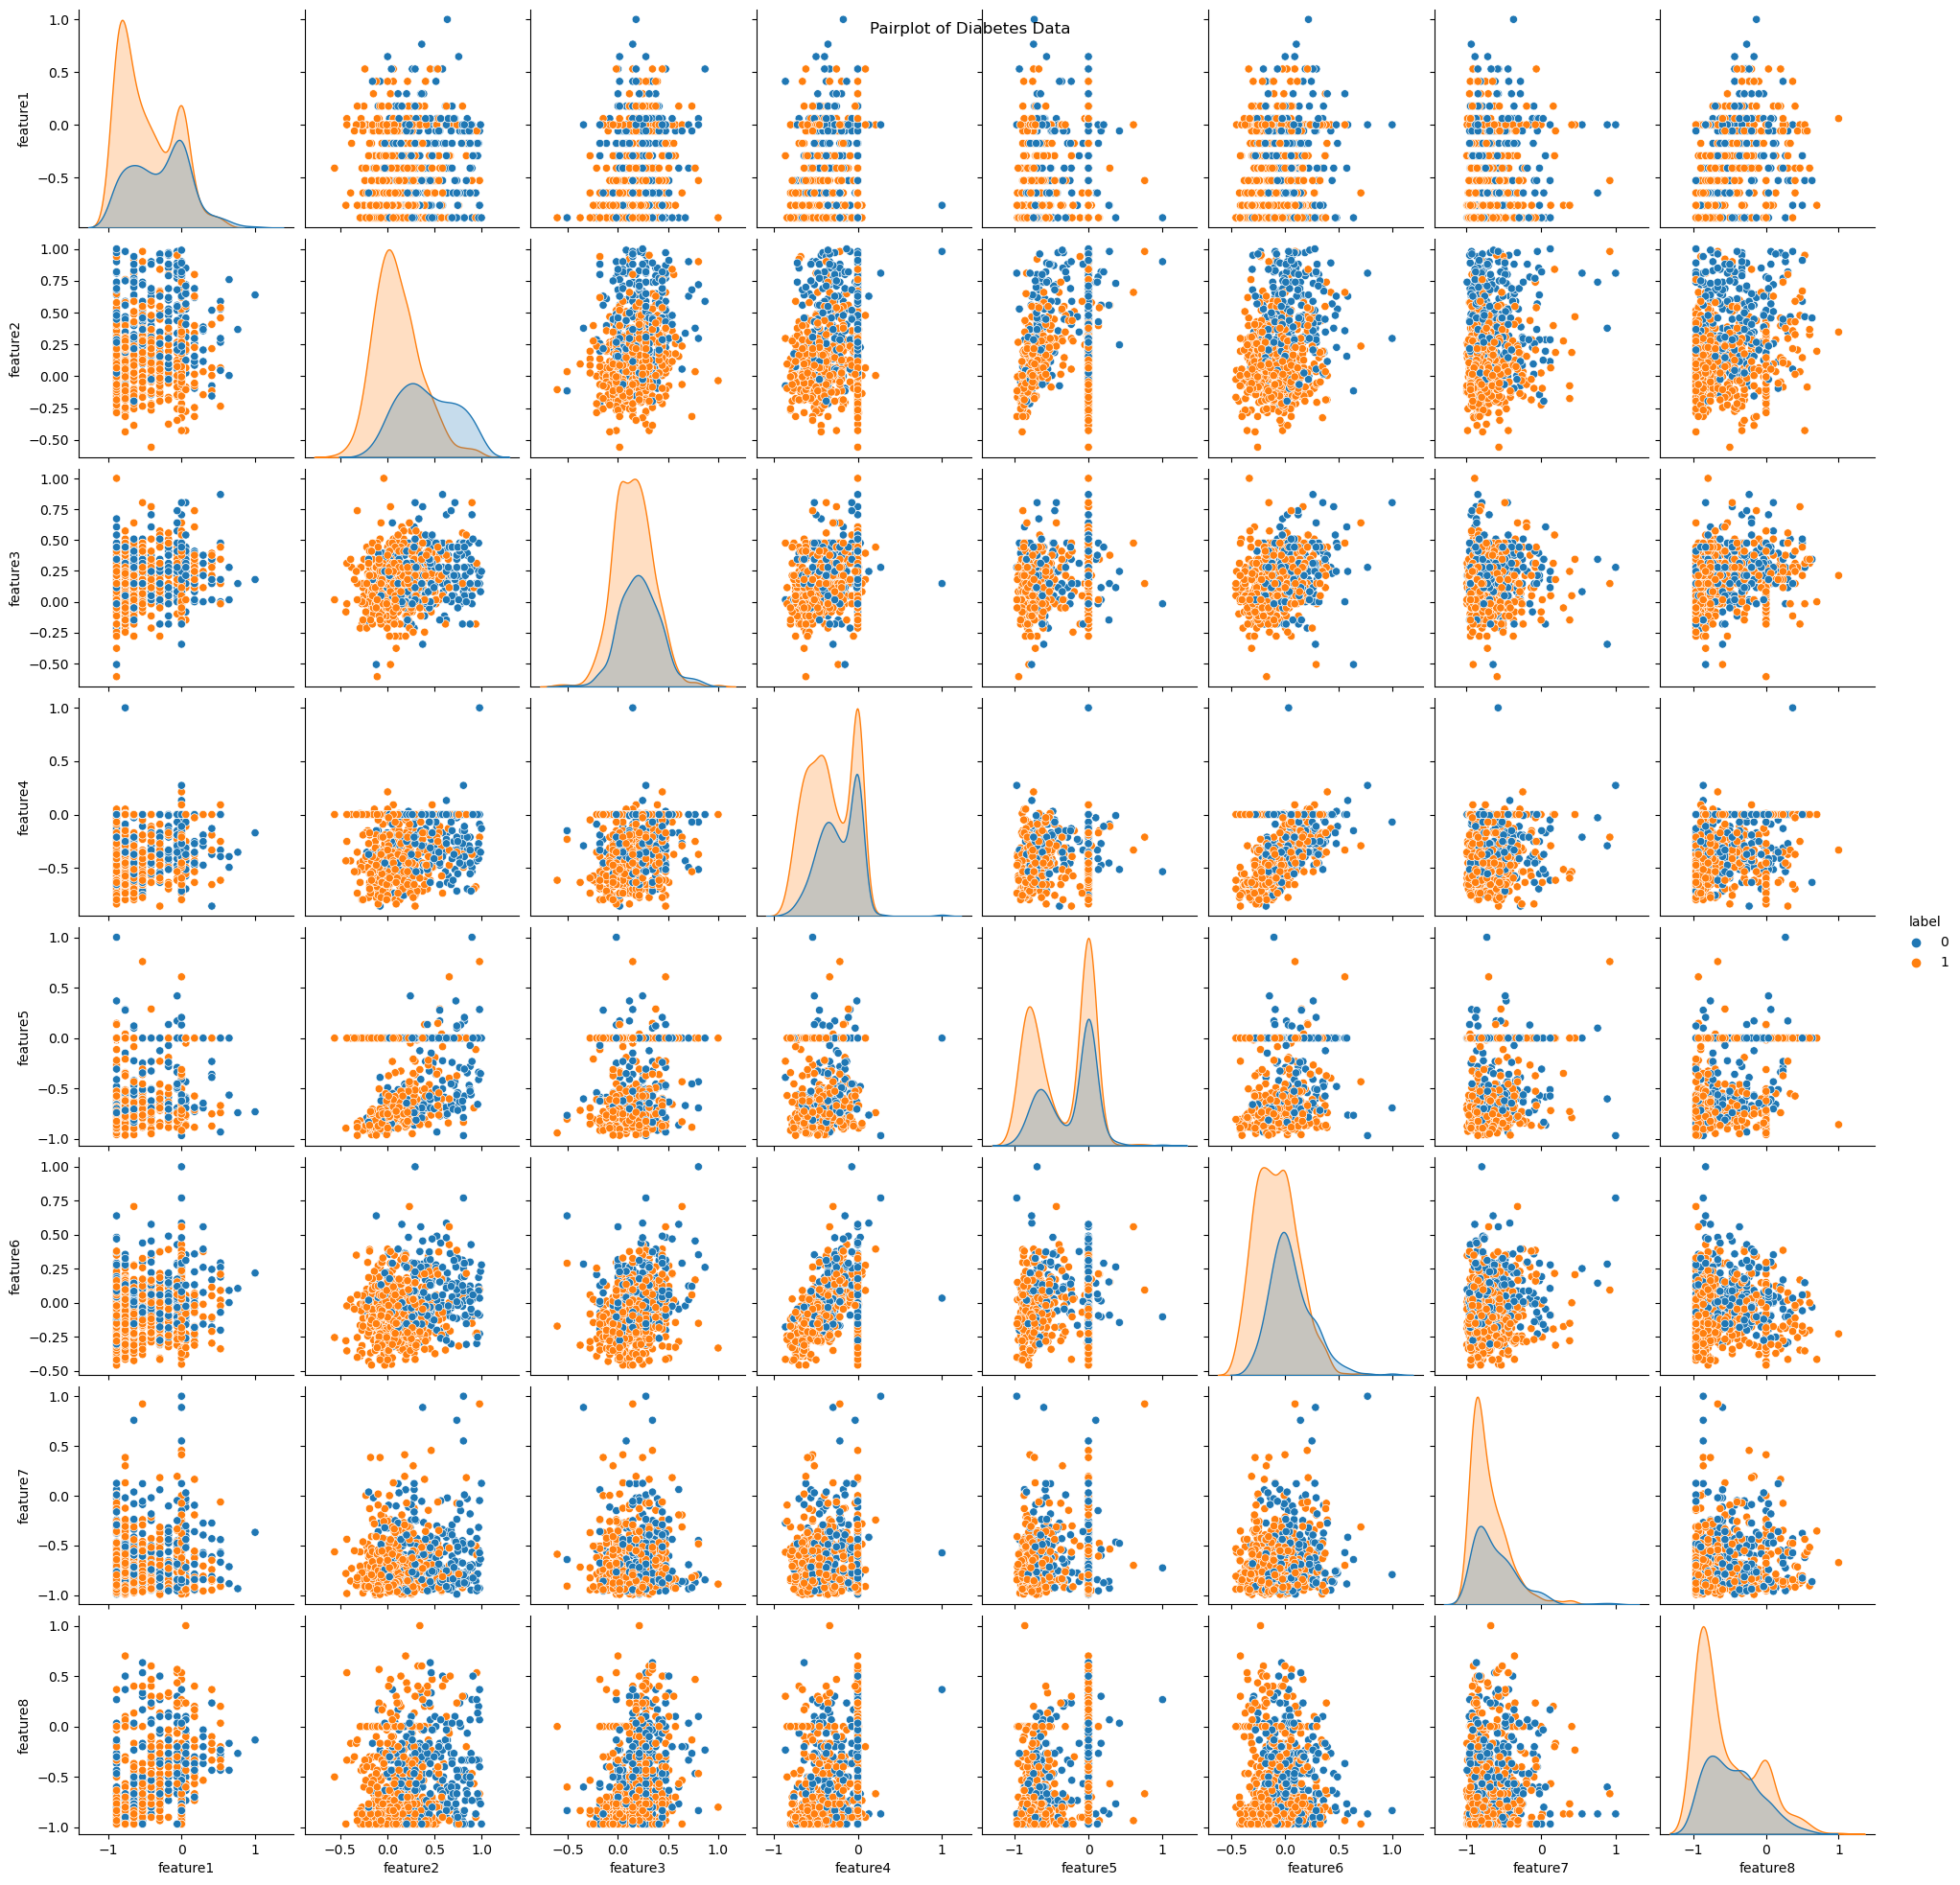

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Pairplot
sns.pairplot(df,  hue="label", diag_kind="kde")
plt.suptitle("Pairplot of Diabetes Data")
plt.show()

AttributeError: 'Axes' object has no attribute 'histogram'

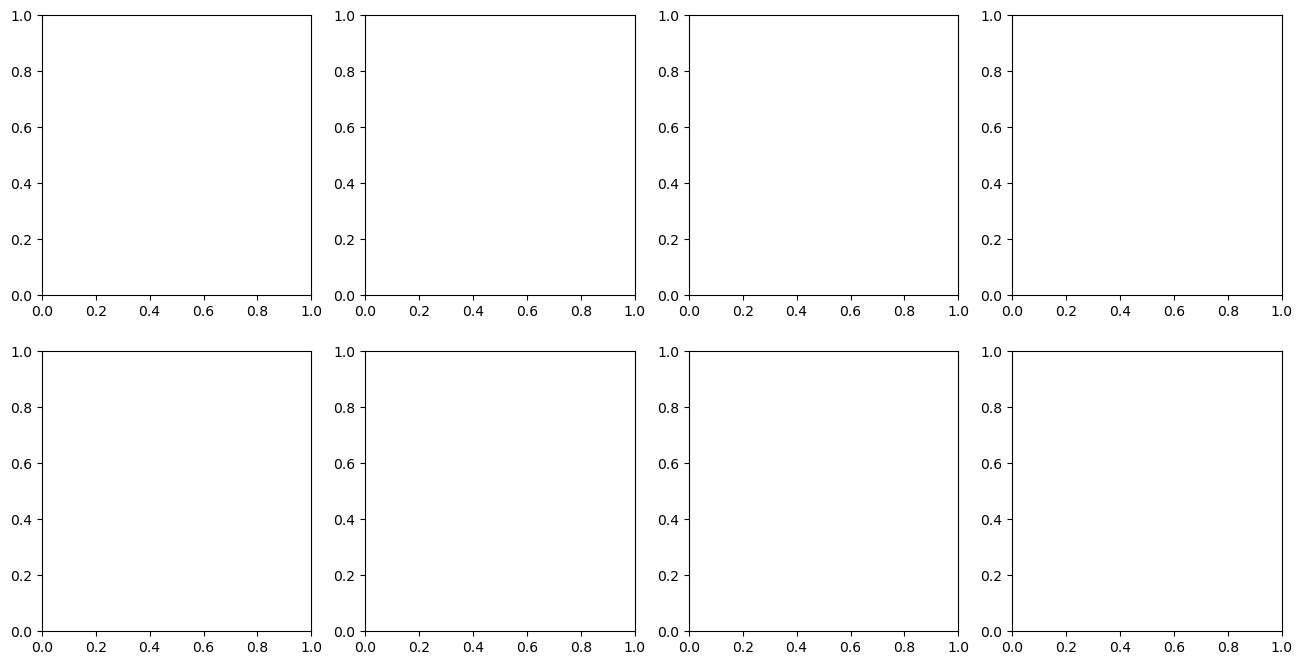

In [223]:
# Create a 2x4 grid of box plots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Plot box plots for each feature in each row
for i, ax in enumerate(axs.flatten()):
    col_name = df.columns[i]  # Extract the feature name
    class_data = [df[df['label'] == 0][col_name], df[df['label'] == 1][col_name]]
    ax.histplot(class_data, labels=['Non Diabetic', 'Diabetic'])
    ax.set_title(f'Boxplot for {col_name}')
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



# Distribution of Glucose levels
plt.figure(figsize=(8, 6))
sns.histplot(df["Glucose"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

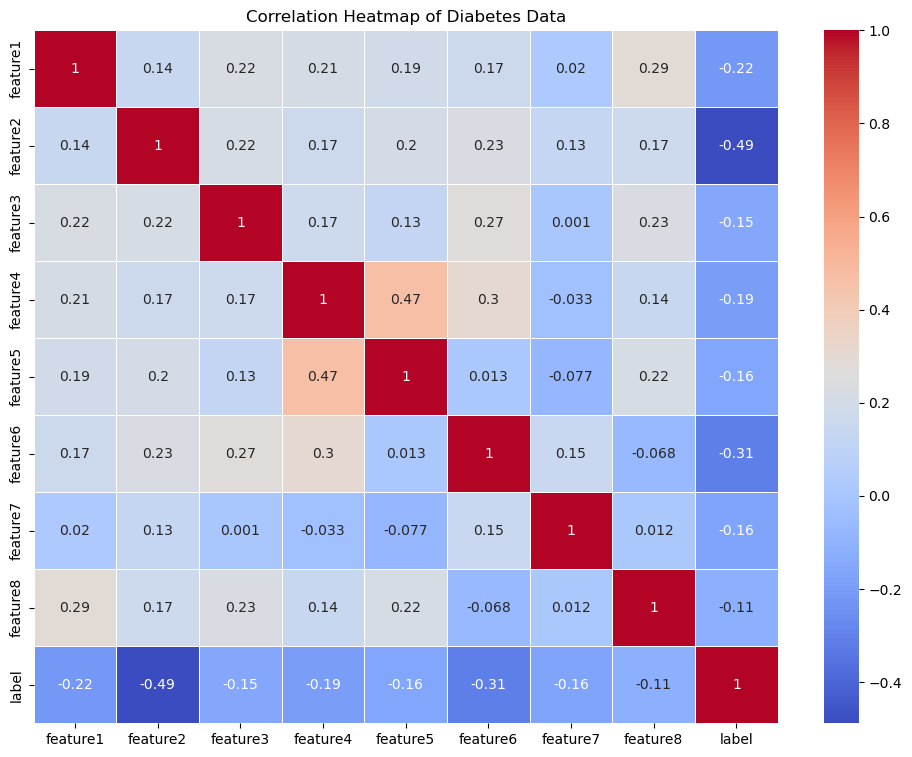

In [391]:
# Correlation Heatmap between all the features and label.
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Diabetes Data")
plt.show()

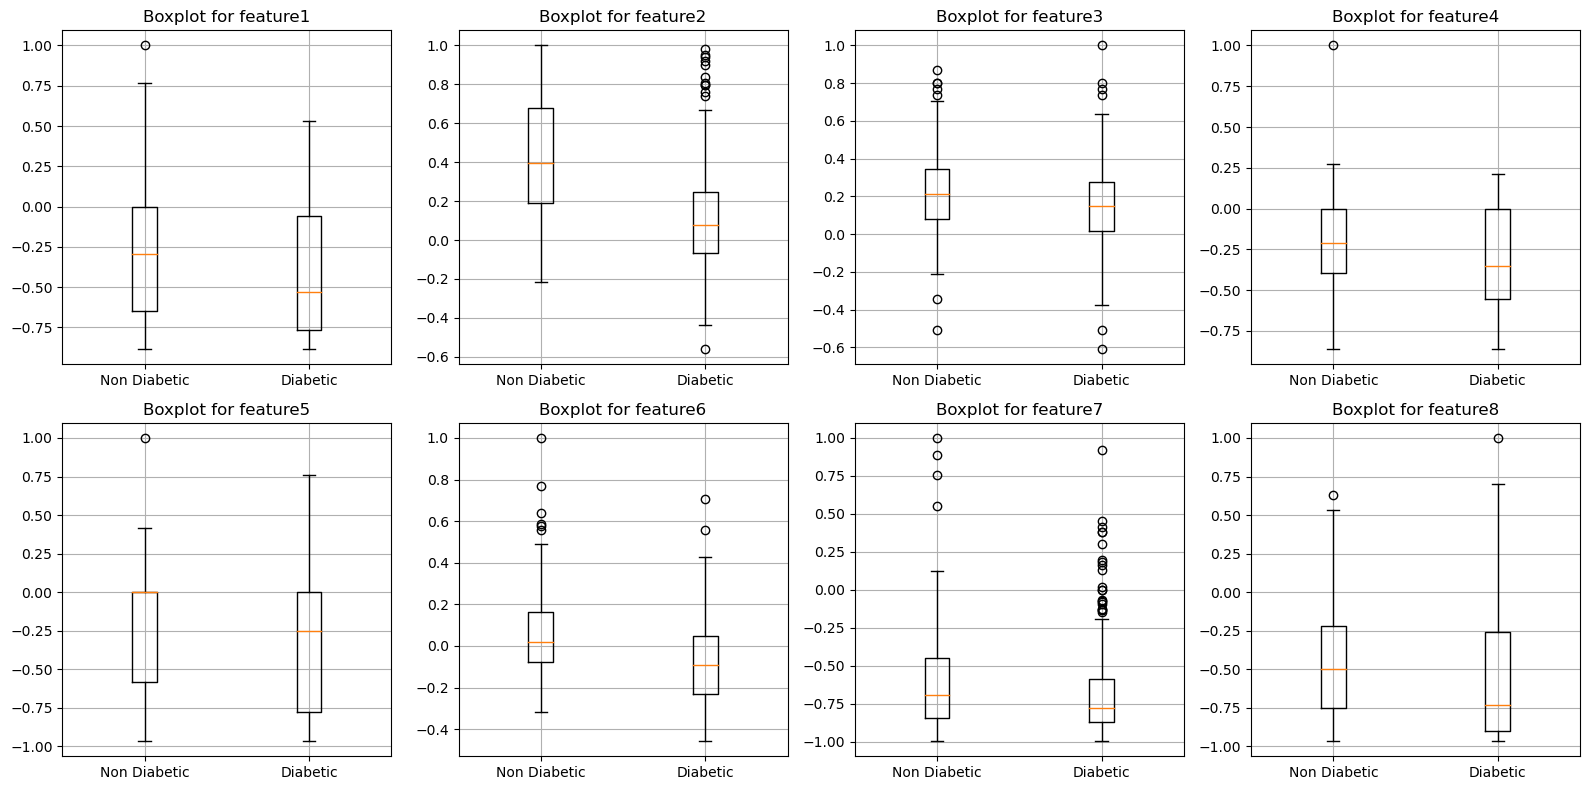

In [392]:
# Create a 2x4 grid of box plots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Plot box plots for each feature in each row
for i, ax in enumerate(axs.flatten()):
    col_name = df.columns[i]  # Extract the feature name
    class_data = [df[df['label'] == 0][col_name], df[df['label'] == 1][col_name]]
    ax.boxplot(class_data, labels=['Non Diabetic', 'Diabetic'])
    ax.set_title(f'Boxplot for {col_name}')
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# # Plot 4: Age distribution for diabetic and non-diabetic individuals
# plt.figure(figsize=(8, 6))
# sns.boxplot(x="label", y="Age", data=df)
# plt.title("Age Distribution for Diabetic and Non-diabetic Individuals")
# plt.xlabel("Diabetes (0: No, 1: Yes)")
# plt.ylabel("Age")
# plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
# plt.show()

In [395]:
# # Plot 5: Count of Pregnancies for diabetic and non-diabetic individuals
# plt.figure(figsize=(8, 6))
# sns.countplot(x="Pregnancies", hue="label", data=df)
# plt.title("Count of Pregnancies for Diabetic and Non-diabetic Individuals")
# plt.xlabel("Pregnancies")
# plt.ylabel("Count")
# plt.legend(title="Diabetes", labels=["Non-Diabetic", "Diabetic"])
# plt.show()

## Step 3. Split into 80% train 20% test


In [8]:
from sklearn.model_selection import train_test_split

def as_tensor(x):
    return torch.tensor(x, dtype=torch.float32)

def split_data(df):
    X = df.drop('label', axis=1).values  # Features
    y = df['label'].values               # Label

    # Split the dataset into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

    print(f'Train Data size = {X_train.shape}')
    print(f'Test  Data size = {X_test.shape}')
    return X_train, X_test, y_train, y_test

def to_tensor(X_train, X_test, y_train, y_test):
    return as_tensor(X_train), as_tensor(X_test), as_tensor(y_train).reshape(-1, 1), as_tensor(y_test).reshape(-1, 1)

X_train, X_test, y_train, y_test = split_data(df)
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = to_tensor(X_train, X_test, y_train, y_test)
print(f'Train Data size = {X_train_tensor.shape}')
print(f'Test  Data size = {X_test_tensor.shape}')


Train Data size = (607, 8)
Test  Data size = (152, 8)
Train Data size = torch.Size([607, 8])
Test  Data size = torch.Size([152, 8])


# PART-1 : PYTORCH
# -----------------------

## Step 4. Modify the model shown in the demo to take the new data

In [9]:
import torch.optim as optim

def single_layer_neural_network(n):
    model = nn.Sequential(
        nn.Linear(n, 1),
        nn.Sigmoid()
        )
    return model

##  Step 5. Train the model on the data

In [279]:
import matplotlib.pyplot as plt
 
def plot_training_metrics(losses, accuracies):
    # Create subplots with 1 row and 3 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the data in each subplot
    axs[0].plot(losses)
    axs[0].set_title('Traing Loss vs Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Training Loss')
    axs[0].grid(True)

    axs[1].plot(accuracies)
    axs[1].set_title('Training Accuracy vs Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Training Accuracy')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


In [309]:
def train(X_train, y_train, nn_model, criterion, optimizer, epochs, batch_size):
    
    losses = []
    accuracies = []
    
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        permutation = torch.randperm(X_train.shape[0])
        
        for i in range(0, X_train.shape[0], batch_size):
            indices = permutation[i:i+batch_size]

            X = X_train[indices]
            y_true = y_train[indices].view(-1, 1)  # Ensure y_true has the correct shape

            optimizer.zero_grad()
            y_pred = nn_model(X)
            loss = criterion(y_pred, y_true)
            loss.backward()
            optimizer.step()

            acc = ((y_pred >= 0.5).float() == y_true).float().mean()  # Adjust for binary classification
            epoch_loss += loss.item()
            epoch_accuracy += acc.item()
            
        losses.append(epoch_loss * batch_size/ len(X_train))
        accuracies.append(epoch_accuracy * batch_size/ len(X_train))

        if (epoch+1)%(epochs//5)==0: 
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {losses[-1]:.4f}, Accuracy: {accuracies[-1]:.4f}')    


    plot_training_metrics(losses, accuracies)
    print('Finished Training')
    return nn_model

Epoch [40/200], Loss: 0.4866, Accuracy: 0.7707
Epoch [80/200], Loss: 0.4750, Accuracy: 0.7721
Epoch [120/200], Loss: 0.4714, Accuracy: 0.7690
Epoch [160/200], Loss: 0.4708, Accuracy: 0.7721
Epoch [200/200], Loss: 0.4702, Accuracy: 0.7723


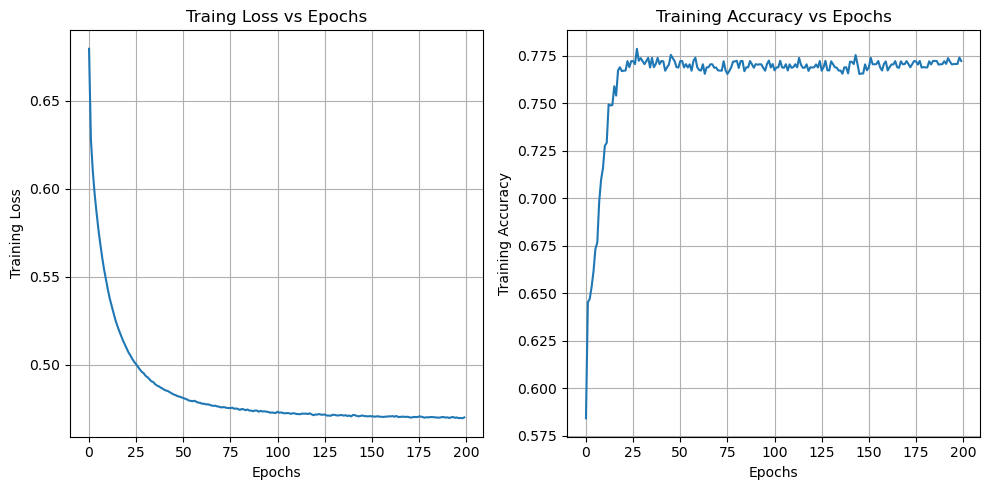

Finished Training


Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
  (1): Sigmoid()
)

In [310]:
single_layer_trained_model = single_layer_neural_network(X_train.shape[1])
single_layer_trained_model = train(X_train_tensor, 
                                   y_train_tensor, 
                                   single_layer_trained_model, 
                                   criterion = nn.BCELoss(),
                                   optimizer = optim.SGD(single_layer_trained_model.parameters(), lr=0.1),
                                   epochs = 200, 
                                   batch_size=32#X_train_tensor.shape[0]
                                  )
single_layer_trained_model

##  Step 6. Make predictions on the test data and compare them to the test labels

In [1]:
def predict_pytorch(model, X):
    model.eval()
    y_prob = model(X)
    print("raw scores = ", y_prob.squeeze()[:5])
    predictions = (y_prob > 0.5).float()
    return predictions

## Step 7. Calculate the accuracy of your results

In [413]:
def calculate_accuracy_pytorch(y_test, y_pred):
    # Calculate accuracy
#     print("pred = ", y_pred[:5])
#     print("true = ", y_test[:5])
    correct_predictions = (y_pred == y_test).sum().item()
    total_samples = y_test.size(0)
#     print(y_pred.shape)
    accuracy = correct_predictions / total_samples * 100
#     print(f"{total_samples = }, {correct_predictions = }")
#     print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

In [415]:
y_pred = predict_pytorch(single_layer_trained_model, X_test_tensor)
accuracy = calculate_accuracy_pytorch(y_test_tensor, y_pred)
print(f"{accuracy = }")

accuracy = 77.63157894736842


## Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

In [416]:
def load_different_pytorch_model(n):

    model0 = nn.Sequential(
        nn.Linear(n, 1),
        nn.Sigmoid()
        )
    
    hidden_features = n//2
    model1 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )

    hidden_features = n
    model2 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )


    hidden_features = n*2
    model3 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )

    hidden_features = n*2
    model4 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )

    hidden_features = n*4
    model5 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features//2),
            nn.ReLU(),
            nn.Linear(hidden_features//2, hidden_features//4),
            nn.ReLU(),
            nn.Linear(hidden_features//4, 1),
            nn.Sigmoid()
            )


    models = [model1, model2, model3, model4, model5]
    return models

In [417]:
# def multi_layer_layer_neural_network(n, hidden_features):
#     model = nn.Sequential(
#         nn.Linear(n, hidden_features),
#         nn.ReLU(),
#         nn.Linear(hidden_features, hidden_features),
#         nn.ReLU(),
#         nn.Linear(hidden_features, 1),
#         nn.Sigmoid()
#         )
#     print(model)
#     return model

## Step 9. Test your hypothesis by training your new models

Sequential(
  (0): Linear(in_features=8, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch [40/200], Loss: 0.4662, Accuracy: 0.7725
Epoch [80/200], Loss: 0.4609, Accuracy: 0.7706
Epoch [120/200], Loss: 0.4584, Accuracy: 0.7771
Epoch [160/200], Loss: 0.4565, Accuracy: 0.7805
Epoch [200/200], Loss: 0.4527, Accuracy: 0.7756


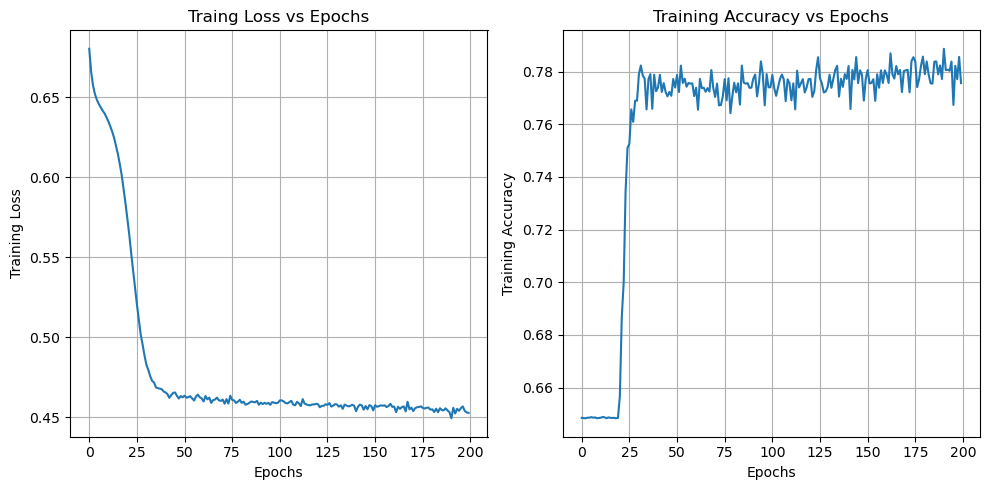

Finished Training
Sequential(
  (0): Linear(in_features=8, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch [40/200], Loss: 0.4866, Accuracy: 0.7719
Epoch [80/200], Loss: 0.4629, Accuracy: 0.7691
Epoch [120/200], Loss: 0.4611, Accuracy: 0.7740
Epoch [160/200], Loss: 0.4555, Accuracy: 0.7724
Epoch [200/200], Loss: 0.4550, Accuracy: 0.7804


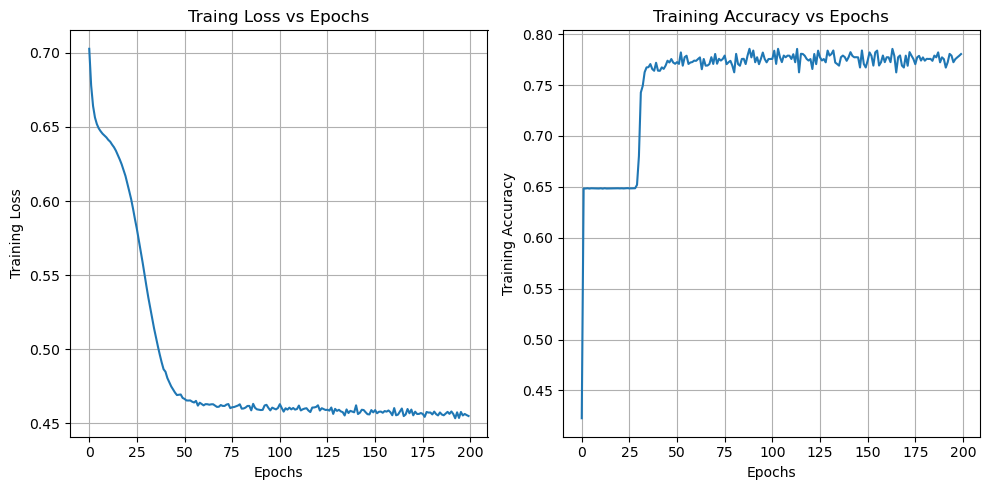

Finished Training
Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch [40/200], Loss: 0.4579, Accuracy: 0.7722
Epoch [80/200], Loss: 0.4412, Accuracy: 0.7838
Epoch [120/200], Loss: 0.4285, Accuracy: 0.7872
Epoch [160/200], Loss: 0.4205, Accuracy: 0.8021
Epoch [200/200], Loss: 0.4183, Accuracy: 0.7937


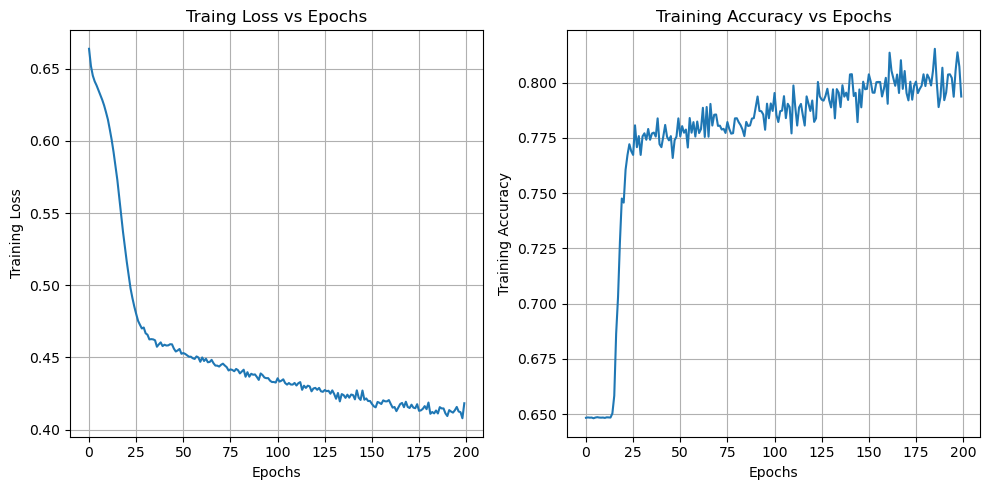

Finished Training
Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
  (7): Sigmoid()
)
Epoch [40/200], Loss: 0.4720, Accuracy: 0.7674
Epoch [80/200], Loss: 0.4485, Accuracy: 0.7739
Epoch [120/200], Loss: 0.4350, Accuracy: 0.7839
Epoch [160/200], Loss: 0.4168, Accuracy: 0.7971
Epoch [200/200], Loss: 0.4134, Accuracy: 0.8052


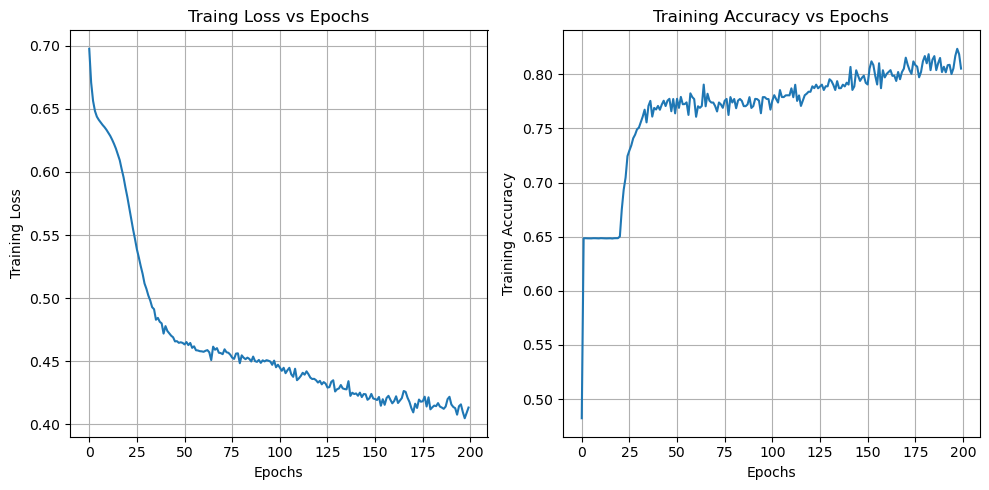

Finished Training
Sequential(
  (0): Linear(in_features=8, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=8, bias=True)
  (7): ReLU()
  (8): Linear(in_features=8, out_features=1, bias=True)
  (9): Sigmoid()
)
Epoch [40/200], Loss: 0.5295, Accuracy: 0.7342
Epoch [80/200], Loss: 0.4429, Accuracy: 0.7906
Epoch [120/200], Loss: 0.4177, Accuracy: 0.8103
Epoch [160/200], Loss: 0.4078, Accuracy: 0.8168
Epoch [200/200], Loss: 0.3950, Accuracy: 0.8103


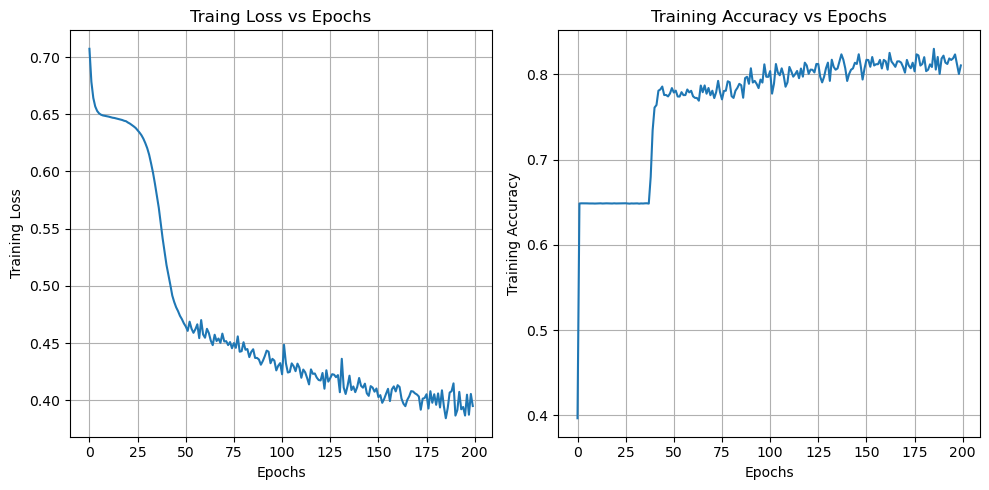

Finished Training


In [418]:
pytorch_models = load_different_pytorch_model(X_train_tensor.shape[1])

for i, pytorch_model in enumerate(pytorch_models):
    print(pytorch_model)
    pytorch_model = train(X_train_tensor, 
                          y_train_tensor, 
                          pytorch_model, 
                          criterion = nn.BCELoss(),
                          optimizer = optim.SGD(pytorch_model.parameters(), lr=0.05),
                          epochs = 200, 
                          batch_size=32#X_train_tensor.shape[0]
                         )
    pytorch_models[i] = pytorch_model


In [ ]:
# multi_layer_trained_model = multi_layer_layer_neural_network(X_train.shape[1], 16)
# multi_layer_trained_model = train(X_train_tensor, 
#                                   y_train_tensor, 
#                                   multi_layer_trained_model, 
#                                   criterion = nn.BCELoss(),
#                                   optimizer = optim.SGD(multi_layer_trained_model.parameters(), lr=0.01),
#                                   epochs = 500, 
#                                   batch_size=32#X_train_tensor.shape[0]
#                                  )
# multi_layer_trained_model

## Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why

In [431]:
result = {"model": [], "train_accuracy": [], "test_accuracy": []}
for i, pytorch_model in enumerate(pytorch_models):
    
    y_train_pred = predict_pytorch(pytorch_model, X_train_tensor)
    train_accuracy = calculate_accuracy_pytorch(y_train_tensor, y_train_pred)
    
    y_test_pred = predict_pytorch(pytorch_model, X_test_tensor)
    test_accuracy = calculate_accuracy_pytorch(y_test_tensor, y_test_pred)
    result["train_accuracy"].append(train_accuracy)
    result["test_accuracy"].append(test_accuracy)
    
    summary_str = ""
    for i, (name, param) in enumerate(pytorch_model.named_parameters()):
        layer_summary = f"Layer {i} Size = {param.shape}, "
        summary_str += layer_summary
    result["model"].append(summary_str)
    
df = pd.DataFrame(result)
df.head(5)

,model,train_accuracy,test_accuracy
0,"Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),",78.418451,76.973684
1,"Layer 0 Size = torch.Size([8, 8]), Layer 1 Size = torch.Size([8]), Layer 2 Size = torch.Size([8, 8]), Layer 3 Size = torch.Size([8]), Layer 4 Size = torch.Size([1, 8]), Layer 5 Size = torch.Size([1]),",76.935750,75.657895
2,"Layer 0 Size = torch.Size([16, 8]), Layer 1 Size = torch.Size([16]), Layer 2 Size = torch.Size([16, 16]), Layer 3 Size = torch.Size([16]), Layer 4 Size = torch.Size([1, 16]), Layer 5 Size = torch.Size([1]),",80.230643,71.710526
3,"Layer 0 Size = torch.Size([16, 8]), Layer 1 Size = torch.Size([16]), Layer 2 Size = torch.Size([16, 16]), Layer 3 Size = torch.Size([16]), Layer 4 Size = torch.Size([16, 16]), Layer 5 Size = torch.Size([16]), Layer 6 Size = torch.Size([1, 16]), Layer 7 Size = torch.Size([1]),",81.878089,73.026316
4,"Layer 0 Size = torch.Size([32, 8]), Layer 1 Size = torch.Size([32]), Layer 2 Size = torch.Size([32, 32]), Layer 3 Size = torch.Size([32]), Layer 4 Size = torch.Size([16, 32]), Layer 5 Size = torch.Size([16]), Layer 6 Size = torch.Size([8, 16]), Layer 7 Size = torch.Size([8]), Layer 8 Size = torch.Size([1, 8]), Layer 9 Size = torch.Size([1]),",81.548600,73.684211


### Explaination

    - Its clear that as the Model is getting complex the training accuracy is getting higher.
    
    - As the model getting mode complex test accuracy is getting lower.
    
    - Higher train accuracy and lower test accuracy point to overfitting of the model becuase.
    
    - Highest accuracy is attained by the simple 3 layer model with 1-input, 1-hidden, 1-output layer.

# PART-2 : TENSORFLOW
# ----------------------------

In [27]:
import tensorflow as tf
import numpy as np

## Step 4. Modify the model shown in the demo to take the new data

In [28]:
def build_single_layer_neural_network_tf(n):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(n,))
    ])

##  Step 5. Train the model on the data

In [352]:
def train_tensorflow(X_train, y_train, nn_model, loss, optimizer, metrics, epochs, batch_size):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like - 
        loss = loss function
        optmizer =  'adam' or 'SGD'
        metrics = which used to evaluate the model
        epocs  = number of iteration the moedls will be trained
        batch_size = how much input will be given to the training algorithm
    """
    nn_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    losses = history.history['loss']
    accuracies = history.history['accuracy']
    plot_training_metrics(losses, accuracies)
    
    return nn_model

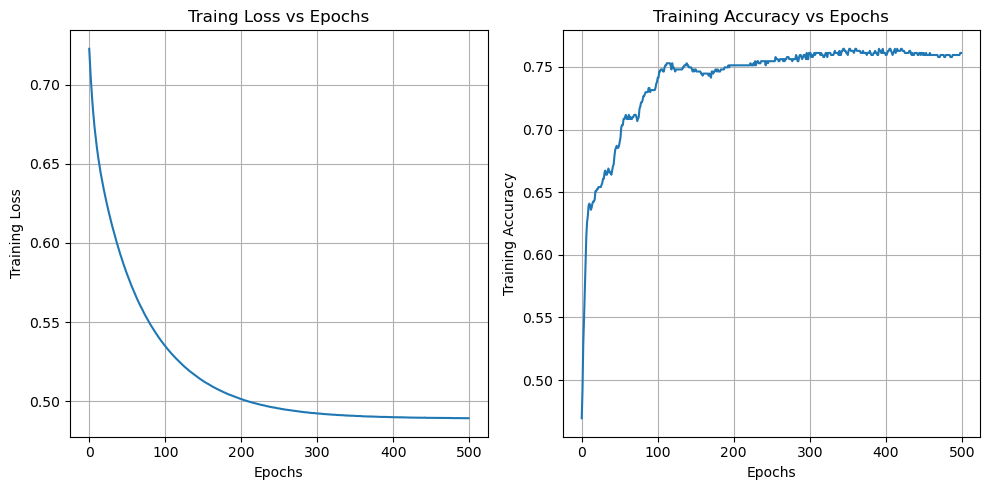

In [358]:
single_layer_neural_network_tf = build_single_layer_neural_network_tf(X_train.shape[1])
single_layer_neural_network_tf = train_tensorflow(X_train, 
                                                   y_train, 
                                                   single_layer_neural_network_tf, 
                                                   loss = tf.keras.losses.BinaryCrossentropy(),
                                                   optimizer = 'adam',
                                                   metrics = ['accuracy'],
                                                   epochs=500,
                                                   batch_size=32#X_train.shape[0]
                                                  )
single_layer_neural_network_tf

##  Step 6. Make predictions on the test data and compare them to the test labels

In [377]:
def predict_tf(model, X):
    y_prob = model.predict(X, verbose=0)
#     print("raw scores = ", y_prob[:5])
    predictions = np.array([1 if pred >= 0.5 else 0 for pred in y_prob])
    return predictions

## Step 7. Calculate the accuracy of your results

In [383]:
def calculate_accuracy_tf(y_test, y_pred):
    # Calculate accuracy
#     print("pred = ", y_pred[:5])
#     print("true = ", y_test[:5])
    correct_predictions = (y_pred == y_test).sum()
    total_samples = y_test.shape[0]
#     print(y_pred.shape)
    accuracy = correct_predictions / total_samples * 100
#     print(f"{total_samples = }, {correct_predictions = }")
#     print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

In [379]:
y_pred = predict_tf(single_layer_neural_network_tf, X_test)
calculate_accuracy_tf(y_test, y_pred)

Accuracy: 82.24%


82.23684210526315

## Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

In [372]:
def load_different_tensorflow_model(n):

    model0 = nn.Sequential(
        nn.Linear(n, 1),
        nn.Sigmoid()
        )
    
    hidden_features = n//2
    model1 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    hidden_features = n
    model2 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    hidden_features = n*2
    model3 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    hidden_features = n*2
    model4 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    hidden_features = n*4
    model5 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(hidden_features//2, activation='relu'),
                                  tf.keras.layers.Dense(hidden_features//4, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    models = [model1, model2, model3, model4, model5]
    return models

In [373]:
# def build_multi_layer_layer_neural_network_tf(n, hidden_features):
#     # Create a Deep Model
#     model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
#                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
#                                  tf.keras.layers.Dense(1, activation='sigmoid')
#                                 ])
#     print(model)
#     return model

## Step 9. Test your hypothesis by training your new models

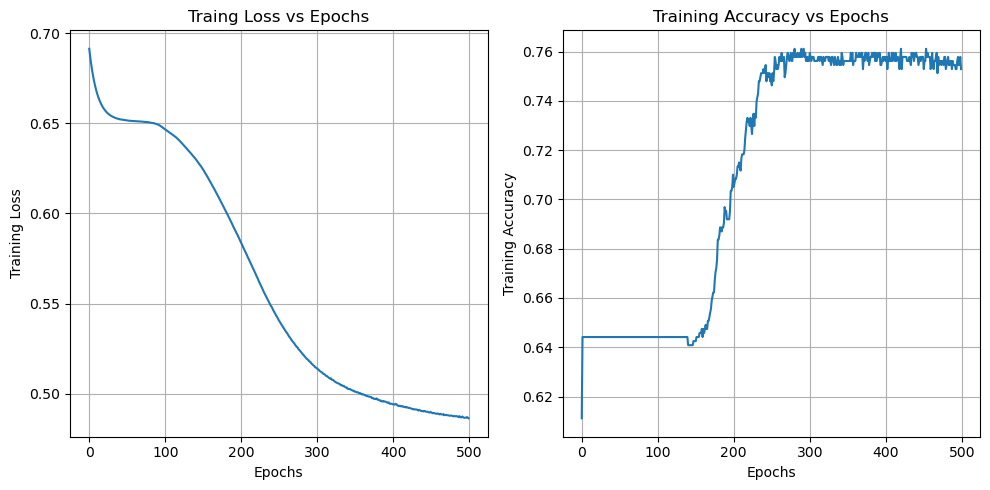

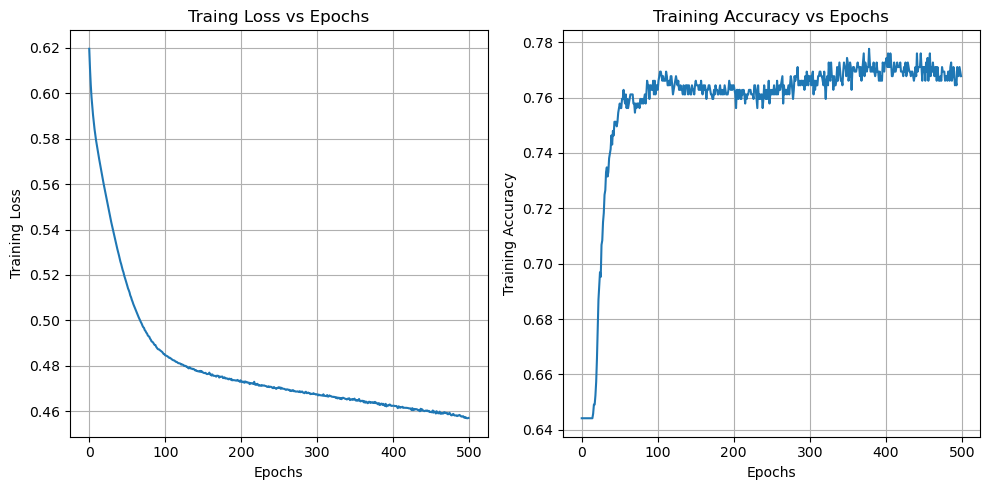

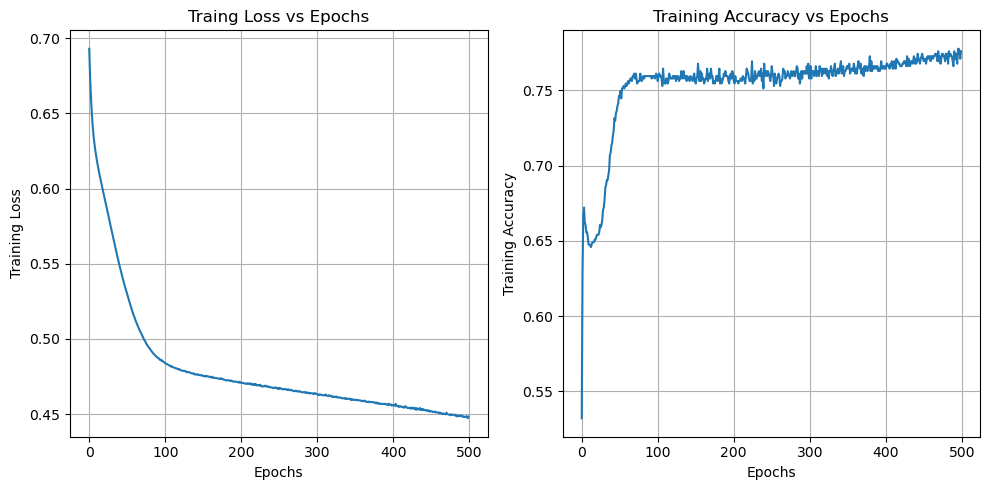

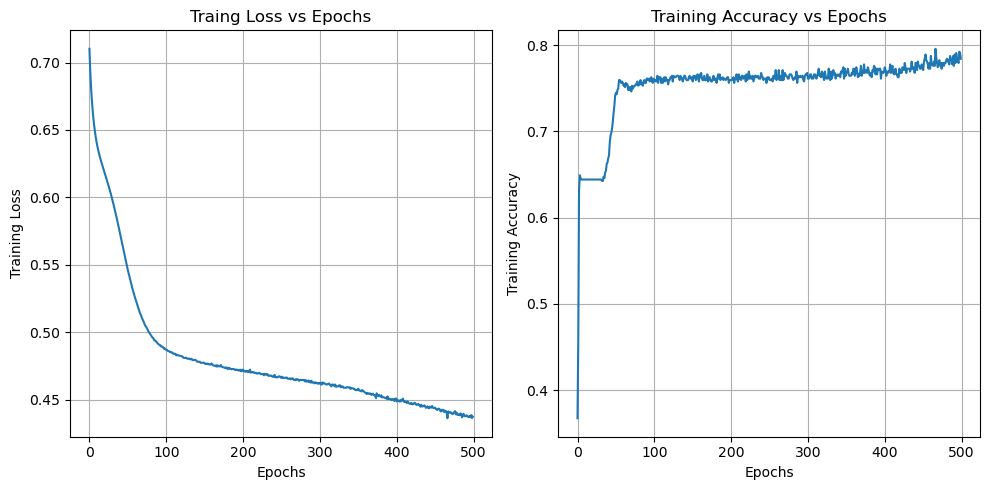

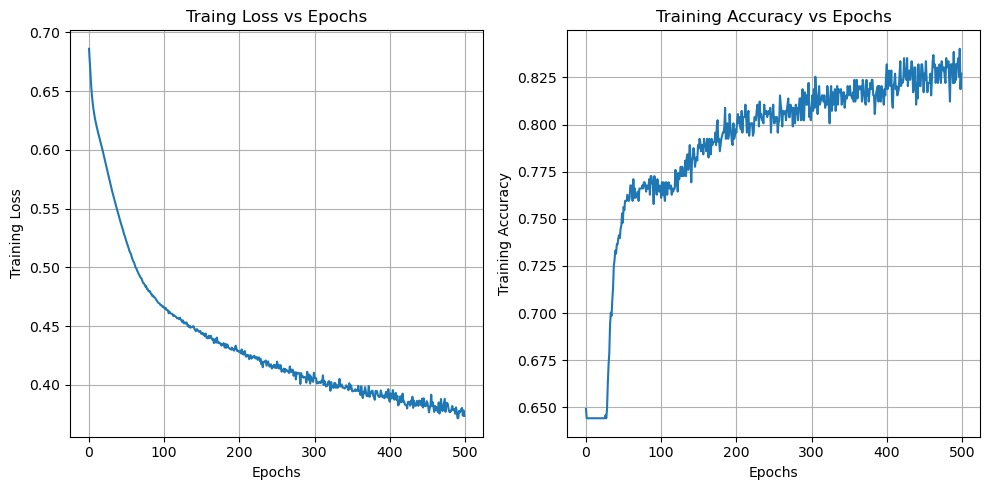

In [374]:
tensorflow_models = load_different_tensorflow_model(X_train_tensor.shape[1])

for i, tensorflow_model in enumerate(tensorflow_models):
    print(tensorflow_model)
    tensorflow_model = train_tensorflow(X_train, 
                                        y_train, 
                                        tensorflow_model, 
                                        loss = tf.keras.losses.BinaryCrossentropy(),
                                        optimizer = 'SGD',
                                        metrics = ['accuracy'],
                                        epochs=500,
                                        batch_size=32#X_train.shape[0]
                                       )
    tensorflow_models[i] = tensorflow_model


In [370]:
# multi_layer_layer_neural_network_tf = build_multi_layer_layer_neural_network_tf(X_train.shape[1], 32)
# multi_layer_layer_neural_network_tf = train_tensorflow(X_train, 
#                                                        y_train, 
#                                                        multi_layer_layer_neural_network_tf, 
#                                                        loss = tf.keras.losses.BinaryCrossentropy(),
#                                                        optimizer = 'SGD',
#                                                        metrics = ['accuracy'],
#                                                        epochs=200,
#                                                        batch_size=32#X_train.shape[0]
#                                                       )
# multi_layer_layer_neural_network_tf
# y_pred = predict(multi_layer_layer_neural_network_tf, X_test)
# calculate_accuracy(y_test, y_pred)

## Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why

In [425]:
result = {"model": [], "train_accuracy": [], "test_accuracy": []}
for i, tensorflow_model in enumerate(tensorflow_models):
    
    y_train_pred = predict_tf(tensorflow_model, X_train)
    train_accuracy = calculate_accuracy_tf(y_train, y_train_pred)
    
    y_test_pred = predict_tf(tensorflow_model, X_test)
    test_accuracy = calculate_accuracy_tf(y_test, y_test_pred)

    result["train_accuracy"].append(train_accuracy)
    result["test_accuracy"].append(test_accuracy)
    
    summary_str = ""
    for i, layer in enumerate(tensorflow_model.layers):
        layer_summary = f"Layer {i}: Size={layer.output_shape[1]}, "
        summary_str += layer_summary
    result["model"].append(summary_str)

    
    
df = pd.DataFrame(result)
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.expand_frame_repr', False)

df.head(5)

,model,train_accuracy,test_accuracy
0,"Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,",75.453048,80.921053
1,"Layer 0: Size=8, Layer 1: Size=8, Layer 2: Size=1,",76.771005,78.947368
2,"Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=1,",77.759473,78.947368
3,"Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=16, Layer 3: Size=1,",78.088962,79.605263
4,"Layer 0: Size=32, Layer 1: Size=32, Layer 2: Size=16, Layer 3: Size=8, Layer 4: Size=1,",82.866557,77.631579


### Explaination

    - As we can see that as the netw

In [385]:
# y_pred = predict_tf(multi_layer_layer_neural_network_tf, X_test)
# calculate_accuracy(y_test, y_pred)

# TEST

In [405]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assuming you have a DataFrame named df with diabetes data

# # Define features (X) and labels (y)
# X = df.drop('label', axis=1).values
# y = df['label'].values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Standardize the data
# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)

# # Build a simple neural network model using TensorFlow
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# losses = history.history['loss']
# accuracy_values = history.history['accuracy']
# plot_training_loss(losses)
# plot_training_loss(accuracy_values)

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
